# Practice notebook for confidence intervals using NHANES data

This notebook will give you the opportunity to practice working with confidence intervals using the NHANES data.

You can enter your code into the cells that say "enter your code here", and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar to code that appears in the case study notebook.  You will need to edit code from that notebook in small ways to adapt it to the prompts below.

To get started, we will use the same module imports and read the data in the same way as we did in the case study:

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm

da = pd.read_csv("nhanes_2015_2016.csv")

In [30]:
da

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5730,93695,2.0,2.0,NaN,1,2,76,3,1.0,3.0,...,112.0,46.0,59.1,165.8,21.5,38.2,37.0,29.5,95.0,2.0
5731,93696,2.0,2.0,NaN,2,1,26,3,1.0,5.0,...,116.0,76.0,112.1,182.2,33.8,43.4,41.8,42.3,110.2,2.0
5732,93697,1.0,NaN,1.0,1,2,80,3,1.0,4.0,...,146.0,58.0,71.7,152.2,31.0,31.3,37.5,28.8,NaN,2.0
5733,93700,NaN,NaN,NaN,1,1,35,3,2.0,1.0,...,106.0,66.0,78.2,173.3,26.0,40.3,37.5,30.6,98.9,2.0


## Question 1

Restrict the sample to women between 35 and 50, then use the marital status variable [DMDMARTL](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDMARTL) to partition this sample into two groups - women who are currently married, and women who are not currently married.  Within each of these groups, calculate the proportion of women who have completed college.  Calculate 95% confidence intervals for each of these proportions.

In [36]:
### Incorrect, come back to fix

da['RIAGENDR'] = da.RIAGENDR.replace({1: "Male", 2: "Female"})
# female = da.loc("Female")

dx = da[["DMDMARTL", "RIAGENDR"]].dropna()
pd.crosstab(dx.DMDMARTL, dx.RIAGENDR)

dz = dx.groupby(dx.RIAGENDR).agg({"DMDMARTL": [lambda x: np.mean(x=="Yes"), np.size]})
dz.columns = ["Proportion", "Total_n"]
dz


#-------------------------------------------------------------
# da['DMDMARTL'] = da.DMDMARTL.replace({1: "Yes", 0: "No"})

# for i in age:
#     if age.all() >= 35 and age.all() <= 50:
#         female = female.append(i)
# female

,Proportion,Total_n
RIAGENDR,,
Female,0.457193,2850
Male,0.562881,2624


__Q1a.__ Identify which of the two confidence intervals is wider, and explain why this is the case. 

__Q1b.__ Write 1-2 sentences summarizing these findings for an audience that does not know what a confidence interval is (the goal here is to report the substance of what you learned about how marital status and educational attainment are related, not to teach a person what a confidence interval is).

## Question 2

Construct 95% confidence intervals for the proportion of smokers who are female, and for the proportion of smokers who are male.  Then construct a 95% confidence interval for the difference between these proportions.

In [38]:
# enter your code here
p = dz.Proportion.Female # Female proportion
n = dz.Total_n.Female # Total number of females
se_female = np.sqrt(p * (1 - p) / n)
print(se_female)

p = dz.Proportion.Male # Male proportion
n = dz["Total_n"].Male # Total number of males
se_male = np.sqrt(p * (1 - p) / n)
print(se_male)

p = dz.Proportion.Female # Female proportion
n = dz.Total_n.Female # Total number of females
lcb = p - 1.96 * np.sqrt(p * (1 - p) / n)  
ucb = p + 1.96 * np.sqrt(p * (1 - p) / n)  
print(lcb, ucb)

0.009331470225993135
0.009683362955535166
0.43890330081319384 0.4754826640990869


__Q2a.__ Discuss why it may be relevant to report the proportions of smokers who are female and male, and contrast this to reporting the proportions of males and females who smoke.

__Q2b.__ How does the width of the confidence interval for the difference of the two proportions compare to the widths of the confidence intervals for each proportion separately?

## Question 3

Construct a 95% interval for height ([BMXHT](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXHT)) in centimeters.  Then convert height from centimeters to inches by dividing by 2.54, and construct a 95% confidence interval for height in inches.  Finally, convert the endpoints (the lower and upper confidence limits) of the confidence interval from inches to back to centimeters   

In [39]:
# enter your code here
p = dz.Proportion.Female # Female proportion
n = dz.Total_n.Female # Total number of females
se_female = np.sqrt(p * (1 - p) / n)
print(se_female)

p = dz.Proportion.Male # Male proportion
n = dz["Total_n"].Male # Total number of males
se_male = np.sqrt(p * (1 - p) / n)
print(se_male)

0.009331470225993135
0.009683362955535166


__Q3a.__ Describe how the confidence interval constructed in centimeters relates to the confidence interval constructed in inches.

## Question 4

Partition the sample based on 10-year age bands, i.e. the resulting groups will consist of people with ages from 18-28, 29-38, etc. Construct 95% confidence intervals for the difference between the mean BMI for females and for males within each age band.

C:\Users\joshb\anaconda3\envs\Strive_AI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\joshb\anaconda3\envs\Strive_AI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\joshb\anaconda3\envs\Strive_AI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpreta

Text(0, 0.5, 'Female - male smoking proportion')

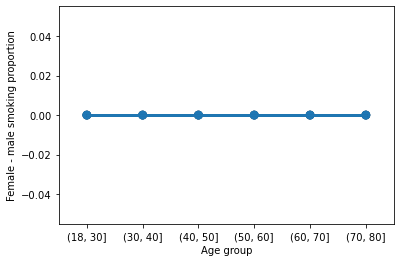

In [41]:
# enter your code here
# Calculate the smoking rates within age/gender groups
da["agegrp"] = pd.cut(da.RIDAGEYR, [18, 30, 40, 50, 60, 70, 80])
pr = da.groupby(["agegrp", "RIAGENDR"]).agg({"SMQ020": lambda x: np.mean(x=="Yes")}).unstack()
pr.columns = ["Female", "Male"]

# The number of people for each calculated proportion
dn = da.groupby(["agegrp", "RIAGENDR"]).agg({"SMQ020": np.size}).unstack()
dn.columns = ["Female", "Male"]

# Standard errors for each proportion
se = np.sqrt(pr * (1 - pr) / dn)

# Standard error for the difference in female/male smoking rates in every age band
se_diff = np.sqrt(se.Female**2 + se.Male**2)

# Standard errors for the difference in smoking rates between genders, within age bands

# The difference in smoking rates between genders
pq = pr.Female - pr.Male

x = np.arange(pq.size)
pp = sns.pointplot(x, pq.values, color='black')
sns.pointplot(x, pq - 2*se_diff)
sns.pointplot(x, pq + 2*se_diff)
pp.set_xticklabels(pq.index)
pp.set_xlabel("Age group")
pp.set_ylabel("Female - male smoking proportion")

__Q4a.__ How do the widths of these confidence intervals differ?  Provide an explanation for any substantial diferences in the confidence interval widths that you see.

## Question 5

Construct a 95% confidence interval for the first and second systolic blood pressure measures, and for the difference between the first and second systolic blood pressure measurements within a subject.

In [43]:
# enter code here
bp1 = da['BPXSY2']
bp2 = da['BPXDI2']

dx = da[["BPXSY2", "BPXDI2"]].dropna()
pd.crosstab(dx.BPXSY2, dx.BPXDI2)

# dz = dx.groupby(dx.BPXSY2).agg({"BPXDI2": [lambda x: np.mean(x=="Yes"), np.size]})
# dz.columns = ["Proportion", "Total_n"]
# dz

# p = dz.Proportion.Female # Female proportion
# n = dz.Total_n.Female # Total number of females
# se_female = np.sqrt(p * (1 - p) / n)
# print(se_female)

# dx = da[["DMDMARTL", "RIAGENDR"]].dropna()
# pd.crosstab(dx.DMDMARTL, dx.RIAGENDR)

# dz = dx.groupby(dx.RIAGENDR).agg({"DMDMARTL": [lambda x: np.mean(x=="Yes"), np.size]})
# dz.columns = ["Proportion", "Total_n"]
# dz

BPXDI2,0.0,24.0,30.0,32.0,34.0,36.0,38.0,40.0,42.0,44.0,...,104.0,106.0,108.0,110.0,112.0,114.0,118.0,128.0,130.0,144.0
BPXSY2,,,,,,,,,,,,,,,,,,,,,
84.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
86.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
90.0,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
92.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
212.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
220.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


__Q5a.__ Based on these confidence intervals, would you say that a difference of zero between the population mean values of the first and second systolic blood pressure measures is consistent with the data?


__Q5b.__ Discuss how the width of the confidence interval for the within-subject difference compares to the widths of the confidence intervals for the first and second measures.

## Question 6

Construct a 95% confidence interval for the mean difference between the average age of a smoker, and the average age of a non-smoker.

In [67]:
# insert your code here
smoke_data = da['SMQ020']
smoke_data = da.SMQ020.replace({1: 'Smoker', 2: 'Non-Smoker'})
smoke_data

non_smoker = []
smoker = []

for i in smoke_data:
    if i == 'Smoker':
        smoker.append(i)
    elif i == 'Non-Smoker':
        non_smoker.append(i)

smoker_num = len(smoker)
non_smoker_num = len(non_smoker)

#==================================

age_data = da['RIDAGEYR']

age_list = []
age_total = 0

for i in age_data:
    age_list.append(i)
    age_total += i
    
age_list

age_list_len = len(age_list)

#=================================

non_smoker_mean = non_smoker_num / age_list_len
smoker_mean = smoker_num / age_list_len

print('Smoker mean is ', smoker_mean)
print('Non smoker mean is ', non_smoker_mean)

Smoker mean is  0.404359197907585
Non smoker mean is  0.593897122929381


__Q6a.__ Use graphical and numerical techniques to compare the variation in the ages of smokers to the variation in the ages of non-smokers.  

In [1]:
# insert your code here

__Q6b.__ Does it appear that uncertainty about the mean age of smokers, or uncertainty about the mean age of non-smokers contributed more to the uncertainty for the mean difference that we are focusing on here?